<a href="https://colab.research.google.com/github/betr0dalf/PZMS/blob/main/PZMS_NovikovDV_prac6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Прикладные задачи математической статистики
# Практическая работа № 6
# Выполнил студент группы ИНБО-05-22
# Новиков Денис Владиславович

## Импорт данных

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import acf, q_stat
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import chi2
import scipy.stats as stats

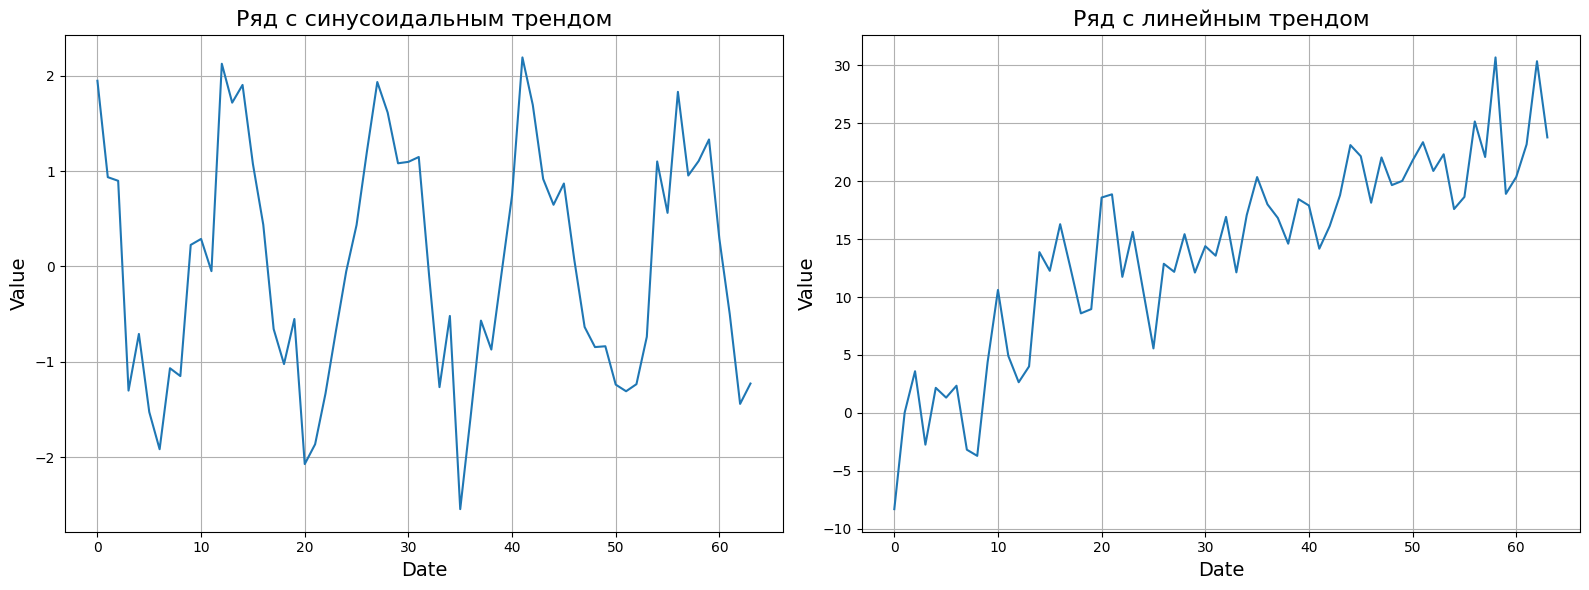

In [ ]:
# Загрузка данных
data_1 = pd.read_csv('1.txt', sep=',', header=None, names=['sin'])
data_2 = pd.read_csv('2.txt', sep=',', header=None, names=['lin'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Ряд с синусоидальным трендом
axes[0].plot(data_1)
axes[0].set_title('Ряд с синусоидальным трендом', fontsize=16)
axes[0].set_xlabel('Date', fontsize=14)
axes[0].set_ylabel('Value', fontsize=14)
axes[0].grid()

# Ряд с линейным трендом
axes[1].plot(data_2)
axes[1].set_title('Ряд с линейным трендом', fontsize=16)
axes[1].set_xlabel('Date', fontsize=14)
axes[1].set_ylabel('Value', fontsize=14)
axes[1].grid()

plt.tight_layout()
plt.show()

In [ ]:
# Функция для расчета Q-статистики Льюнг-Бокса
def calculate_q_statistic(residuals, lags):
    q_stat_value, p_value = q_stat(acf(residuals, nlags=lags), len(residuals))

    return q_stat_value[-1]

In [ ]:
# Тест Дарбина-Уотсона подсчет
def calculate_Durbin(data, smooth):

  # Вычисление остатков после исключения тренда
  e = data - smooth
  e = e.dropna()

  # Выполнение теста Дарбина-Уотсона на остатках
  dw_stat = durbin_watson(e)

  print(f'Durbin-Watson statistic: {dw_stat.round(3)}')

  return dw_stat

## SMA-сглаживание

In [ ]:
# Функция для вычисления SMA
def calculate_sma(data, window):
    return data.rolling(window=window).mean()

In [ ]:
def find_optimal_window_SMA(data):
    m = np.arange(3, 10, 2)
    lag = 5

    optimal_window = None
    min_q_stat = float('inf')

    for window in m:
        sma = calculate_sma(data, window)
        residuals = data - sma
        residuals = residuals.dropna()  # Удаляем NaN значения
        q_stat_value = calculate_q_statistic(residuals, lag)
        if q_stat_value < min_q_stat:
            min_q_stat = q_stat_value
            optimal_window = window

    print(f'Optimal window size: {optimal_window}')
    return optimal_window

Первый набор данных:
Optimal window size: 3
Durbin-Watson statistic: 1.098
Есть положительная автокорреляция:  1.098 < 1.567


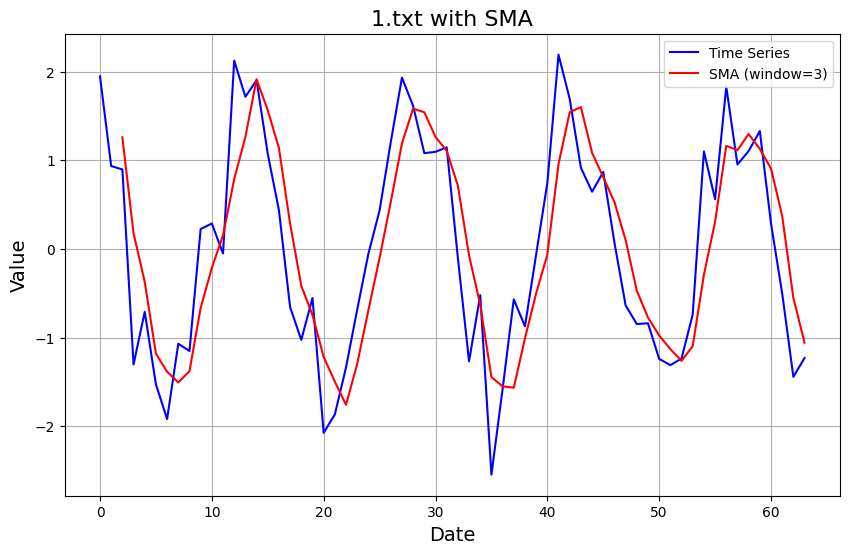


Второй набор данных:
Optimal window size: 9
Durbin-Watson statistic: 1.22
Есть положительная автокорреляция:  1.22 < 1.567


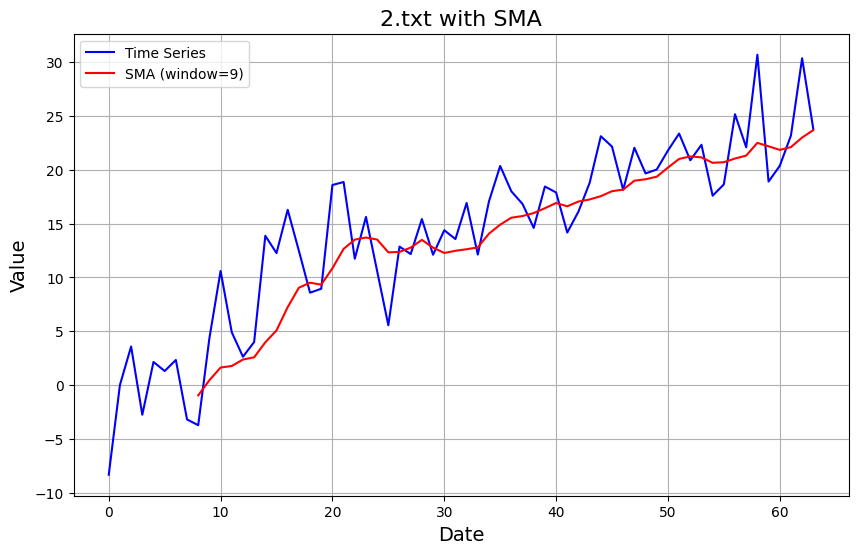

In [ ]:
# Первый набор данных
print('Первый набор данных:')

optimal_window_1 = find_optimal_window_SMA(data_1['sin'])

# Расчет SMA с оптимальным размером окна
data_1['SMA'] = calculate_sma(data_1['sin'], optimal_window_1)

# Тест Дарбина-Уотсона
dw_stat_1 = calculate_Durbin(data_1['sin'], data_1['SMA'])

if 2 < dw_stat_1 <=4:
    dw_1 = 4 - dw_stat_1
else:
  dw_1 = dw_stat_1

if 0 <= dw_1 < 1.567:
  print("Есть положительная автокорреляция: ", dw_1.round(3), '< 1.567')
elif dw_stat_1 >= 1.629:
  print("Автокорреляция отсуствует", dw_1.round(3), '>= 1.629')
else:
  print("Неопределенность", '1.567 <=', dw_1.round(3), '< 1.629')

plt.figure(figsize=(10, 6))
plt.plot(data_1.index, data_1['sin'], linestyle='-', color='b', label='Time Series')
plt.plot(data_1.index, data_1['SMA'], linestyle='-', color='r', label=f'SMA (window={optimal_window_1})')
plt.title('1.txt with SMA', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()
print()

# Второй набор данных
print('Второй набор данных:')
optimal_window = find_optimal_window_SMA(data_2['lin'])

# Расчет SMA с оптимальным размером окна
data_2['SMA'] = calculate_sma(data_2['lin'], optimal_window)

# Тест Дарбина-Уотсона
dw_stat = calculate_Durbin(data_2['lin'], data_2['SMA'])

if 2 < dw_stat <=4:
    dw = 4 - dw_stat
else:
  dw = dw_stat

if 0 <= dw < 1.567:
  print("Есть положительная автокорреляция: ", dw.round(3), '< 1.567')
elif dw_stat >= 1.629:
  print("Автокорреляция отсуствует", dw.round(3), '>= 1.629')
else:
  print("Неопределенность", '1.567 <=', dw.round(3), '< 1.629')

plt.figure(figsize=(10, 6))
plt.plot(data_2.index, data_2['lin'], linestyle='-', color='b', label='Time Series')
plt.plot(data_2.index, data_2['SMA'], linestyle='-', color='r', label=f'SMA (window={optimal_window})')
plt.title('2.txt with SMA', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

## WMA-сглаживание

In [ ]:
# Функция для расчета WMA
def calculate_wma(series, window):
    weights = np.arange(1, window + 1)
    wma = series.rolling(window=window).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)
    return wma

In [ ]:
def find_optimal_window_WMA(data):
    m = np.arange(3, 10, 2)
    lag = 5

    optimal_window = None
    min_q_stat = float('inf')

    for window in m:
        wma = calculate_wma(data, window)
        residuals = data - wma
        residuals = residuals.dropna()  # Удаляем NaN значения
        q_stat_value = calculate_q_statistic(residuals, lag)
        if q_stat_value < min_q_stat:
            min_q_stat = q_stat_value
            optimal_window = window

    print(f'Optimal window size: {optimal_window}')
    return optimal_window

Первый набор данных:
Optimal window size: 3
Durbin-Watson statistic: 1.358
Есть положительная автокорреляция:  1.358 < 1.567


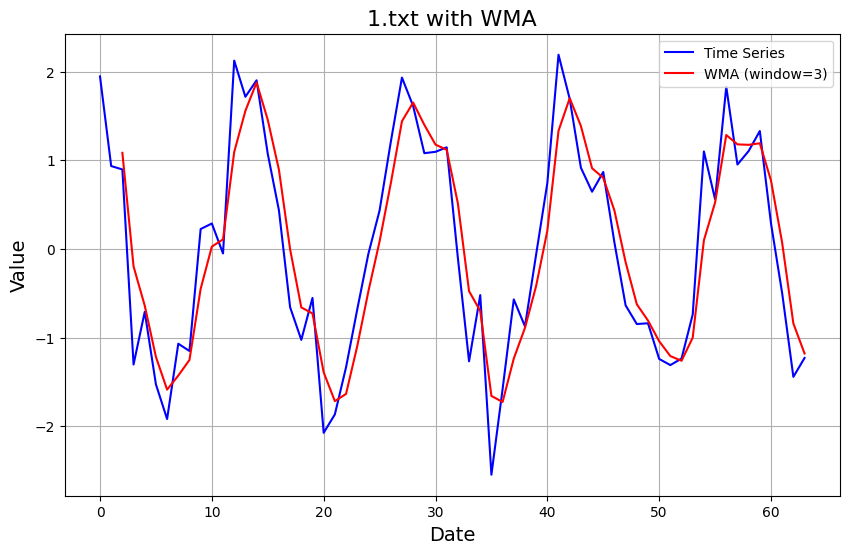


Второй набор данных:
Optimal window size: 9
Durbin-Watson statistic: 1.491
Есть положительная автокорреляция:  1.491 < 1.567


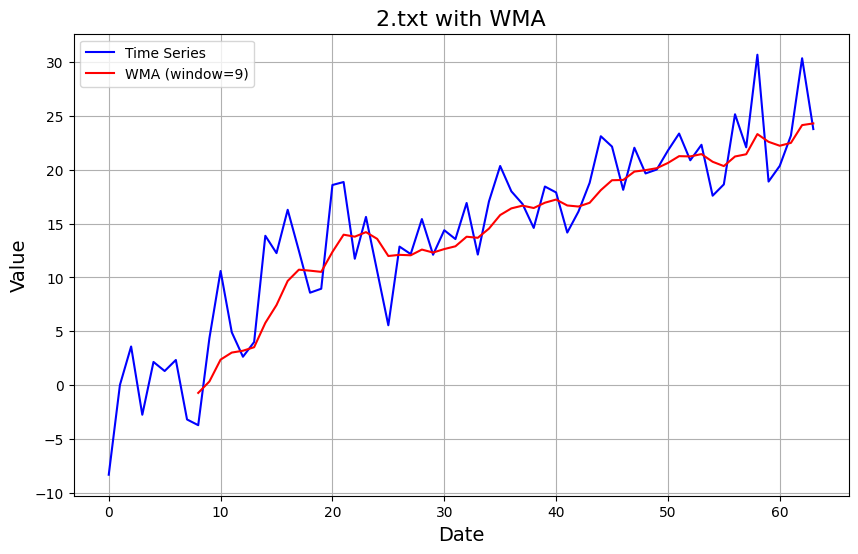

In [ ]:
# Первый набор данных
print('Первый набор данных:')

optimal_window_1 = find_optimal_window_WMA(data_1['sin'])

# Расчет WMA с оптимальным размером окна
data_1['WMA'] = calculate_wma(data_1['sin'], optimal_window_1)

# Тест Дарбина-Уотсона
dw_stat_1 = calculate_Durbin(data_1['sin'], data_1['WMA'])

if 2 < dw_stat_1 <=4:
    dw_1 = 4 - dw_stat_1
else:
  dw_1 = dw_stat_1

if 0 <= dw_1 < 1.567:
  print("Есть положительная автокорреляция: ", dw_1.round(3), '< 1.567')
elif dw_stat_1 >= 1.629:
  print("Автокорреляция отсуствует", dw_1.round(3), '>= 1.629')
else:
  print("Неопределенность", '1.567 <=', dw_1.round(3), '< 1.629')

plt.figure(figsize=(10, 6))
plt.plot(data_1.index, data_1['sin'], linestyle='-', color='b', label='Time Series')
plt.plot(data_1.index, data_1['WMA'], linestyle='-', color='r', label=f'WMA (window={optimal_window_1})')
plt.title('1.txt with WMA', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()
print()

# Второй набор данных
print('Второй набор данных:')

optimal_window = find_optimal_window_WMA(data_2['lin'])

# Расчет WMA с оптимальным размером окна
data_2['WMA'] = calculate_wma(data_2['lin'], optimal_window)

# Тест Дарбина-Уотсона
dw_stat = calculate_Durbin(data_2['lin'], data_2['WMA'])

if 2 < dw_stat <=4:
    dw = 4 - dw_stat
else:
  dw = dw_stat

if 0 <= dw < 1.567:
  print("Есть положительная автокорреляция: ", dw.round(3), '< 1.567')
elif dw_stat >= 1.629:
  print("Автокорреляция отсуствует", dw.round(3), '>= 1.629')
else:
  print("Неопределенность", '1.567 <=', dw.round(3), '< 1.629')

plt.figure(figsize=(10, 6))
plt.plot(data_2.index, data_2['lin'], linestyle='-', color='b', label='Time Series')
plt.plot(data_2.index, data_2['WMA'], linestyle='-', color='r', label=f'WMA (window={optimal_window})')
plt.title('2.txt with WMA', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

## EMA-сглаживание

In [ ]:
# Функция для расчета EMA
def calculate_ema(series, alpha):
    ema = series.ewm(alpha=alpha, adjust=False).mean()
    return ema

In [ ]:
def find_optimal_alpha_EMA(data):
    alpha_values = np.arange(0.1, 0.9, 0.1)
    lag = 5

    optimal_alpha = None
    min_q_stat = float('inf')

    for alpha in alpha_values:
        ema = calculate_ema(data, alpha)
        residuals = data - ema
        q_stat_value = calculate_q_statistic(residuals, lag)
        if q_stat_value < min_q_stat:
            min_q_stat = q_stat_value
            optimal_alpha = alpha

    print(f'Оптимальный параметр сглаживания: {optimal_alpha}')

    return optimal_alpha

Первый набор данных:
Оптимальный параметр сглаживания: 0.8
Durbin-Watson statistic: 1.358
Есть положительная автокорреляция:  1.358 < 1.567


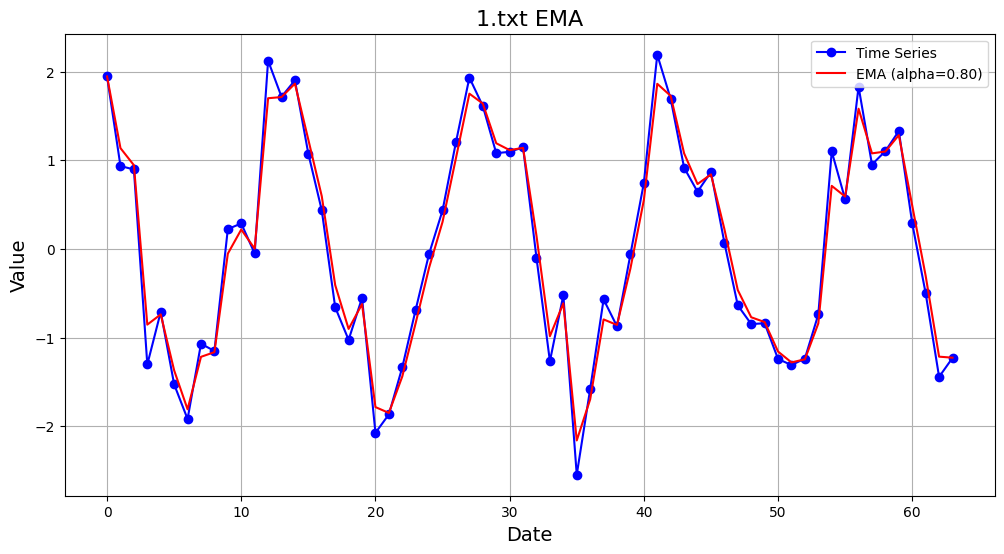


Второй набор данных:
Оптимальный параметр сглаживания: 0.2
Durbin-Watson statistic: 0.075
Есть положительная автокорреляция:  0.075 < 1.567


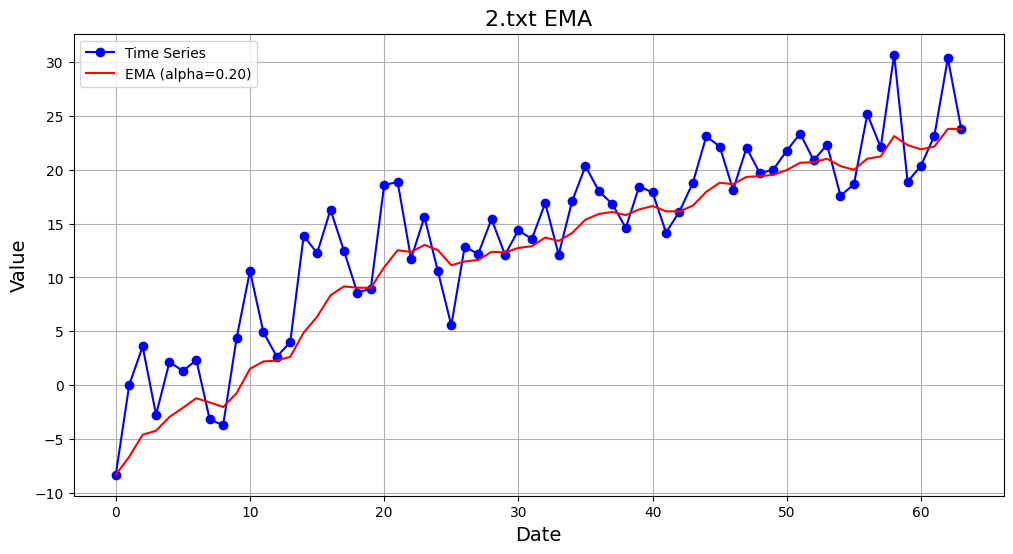

In [ ]:
# Первый набор данных
print('Первый набор данных:')

optimal_alpha = find_optimal_alpha_EMA(data_1['sin'])

# Расчет EMA с оптимальным alpha
data_1['EMA'] = calculate_ema(data_1['sin'], optimal_alpha)

# Тест Дарбина-Уотсона
dw_stat_1 = calculate_Durbin(data_1['sin'], data_1['WMA'])

if 2 < dw_stat_1 <=4:
    dw_1 = 4 - dw_stat_1
else:
  dw_1 = dw_stat_1

if 0 <= dw_1 < 1.567:
  print("Есть положительная автокорреляция: ", dw_1.round(3), '< 1.567')
elif dw_stat_1 >= 1.629:
  print("Автокорреляция отсуствует", dw_1.round(3), '>= 1.629')
else:
  print("Неопределенность", '1.567 <=', dw_1.round(3), '< 1.629')

plt.figure(figsize=(12, 6))
plt.plot(data_1.index, data_1['sin'], marker='o', linestyle='-', color='b', label='Time Series')
plt.plot(data_1.index, data_1['EMA'], marker='', linestyle='-', color='r', label=f'EMA (alpha={optimal_alpha:.2f})')
plt.title('1.txt EMA', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()
print()

# Второй набор данных
print('Второй набор данных:')

optimal_alpha_2 = find_optimal_alpha_EMA(data_2['lin'])

# Расчет EMA с оптимальным alpha
data_2['EMA'] = calculate_ema(data_2['lin'], optimal_alpha_2)

# Тест Дарбина-Уотсона
dw_stat_1 = calculate_Durbin(data_2['lin'], data_1['WMA'])

if 2 < dw_stat_1 <=4:
    dw_1 = 4 - dw_stat_1
else:
  dw_1 = dw_stat_1

if 0 <= dw_1 < 1.567:
  print("Есть положительная автокорреляция: ", dw_1.round(3), '< 1.567')
elif dw_stat_1 >= 1.629:
  print("Автокорреляция отсуствует", dw_1.round(3), '>= 1.629')
else:
  print("Неопределенность", '1.567 <=', dw_1.round(3), '< 1.629')

plt.figure(figsize=(12, 6))
plt.plot(data_2.index, data_2['lin'], marker='o', linestyle='-', color='b', label='Time Series')
plt.plot(data_2.index, data_2['EMA'], marker='', linestyle='-', color='r', label=f'EMA (alpha={optimal_alpha_2:.2f})')
plt.title('2.txt EMA', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

## DEMA-сглаживание

In [ ]:
# Функция для расчета DEMA
def calculate_dema(series, alpha1, alpha2):
    ema1 = calculate_ema(series, alpha1)
    ema2 = calculate_ema(ema1, alpha2)
    dema = 2 * ema1 - ema2
    return dema

In [ ]:
def find_optimal_alphas_DEMA(data):
    alpha_values = np.arange(0.1, 0.9, 0.1)
    lag = 5

    optimal_alpha = None
    min_q_stat = float('inf')

    for alpha in alpha_values:
      for a in alpha_values:
          dema = calculate_dema(data, alpha, a)
          residuals = data - dema
          q_stat_value = calculate_q_statistic(residuals, lag)
          if q_stat_value < min_q_stat:
              min_q_stat = q_stat_value
              optimal_alpha1 = alpha
              optimal_alpha2 = a

    print(f'Оптимальный параметр сглаживания: {optimal_alpha1, optimal_alpha2}')

    return optimal_alpha1, optimal_alpha2

Первый набор данных:
Оптимальный параметр сглаживания: (0.6, 0.6)
Durbin-Watson statistic: 1.358
Есть положительная автокорреляция:  1.358 < 1.567


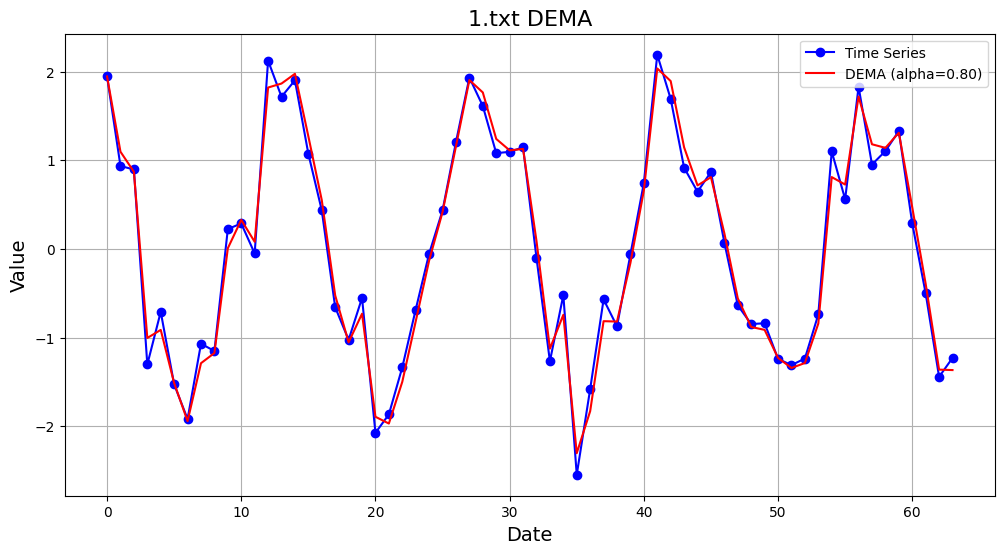


Второй набор данных:
Оптимальный параметр сглаживания: (0.2, 0.6)
Durbin-Watson statistic: 0.075
Есть положительная автокорреляция:  0.075 < 1.567


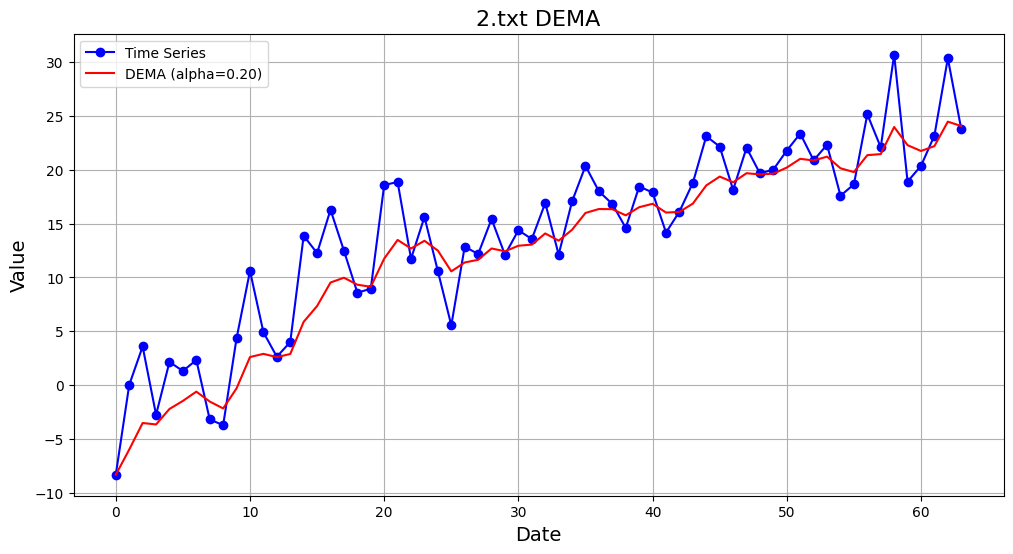

In [ ]:
# Первый набор данных
print('Первый набор данных:')

# Параметры для EMA
alpha1, alpha2 = find_optimal_alphas_DEMA(data_1['sin'])

# Расчет EMA с оптимальным alpha
data_1['DEMA'] = calculate_dema(data_1['sin'], alpha1, alpha2)

# Тест Дарбина-Уотсона
dw_stat_1 = calculate_Durbin(data_1['sin'], data_1['WMA'])

if 2 < dw_stat_1 <=4:
    dw_1 = 4 - dw_stat_1
else:
  dw_1 = dw_stat_1

if 0 <= dw_1 < 1.567:
  print("Есть положительная автокорреляция: ", dw_1.round(3), '< 1.567')
elif dw_stat_1 >= 1.629:
  print("Автокорреляция отсуствует", dw_1.round(3), '>= 1.629')
else:
  print("Неопределенность", '1.567 <=', dw_1.round(3), '< 1.629')

# Расчет DEMA
data_1['DEMA'] = calculate_dema(data_1['sin'], alpha1, alpha2)

plt.figure(figsize=(12, 6))
plt.plot(data_1.index, data_1['sin'], marker='o', linestyle='-', color='b', label='Time Series')
plt.plot(data_1.index, data_1['DEMA'], marker='', linestyle='-', color='r', label=f'DEMA (alpha={optimal_alpha:.2f})')
plt.title('1.txt DEMA', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()
print()

# Второй набор данных
print('Второй набор данных:')

alpha1, alpha2 = find_optimal_alphas_DEMA(data_2['lin'], )

# Расчет EMA с оптимальным alpha
data_2['DEMA'] = calculate_dema(data_2['lin'], alpha1, alpha2)

# Тест Дарбина-Уотсона
dw_stat_1 = calculate_Durbin(data_2['lin'], data_1['WMA'])

if 2 < dw_stat_1 <=4:
    dw_1 = 4 - dw_stat_1
else:
  dw_1 = dw_stat_1

if 0 <= dw_1 < 1.567:
  print("Есть положительная автокорреляция: ", dw_1.round(3), '< 1.567')
elif dw_stat_1 >= 1.629:
  print("Автокорреляция отсуствует", dw_1.round(3), '>= 1.629')
else:
  print("Неопределенность", '1.567 <=', dw_1.round(3), '< 1.629')

# Расчет DEMA
data_2['DEMA'] = calculate_dema(data_2['lin'], alpha1, alpha2)

plt.figure(figsize=(12, 6))
plt.plot(data_2.index, data_2['lin'], marker='o', linestyle='-', color='b', label='Time Series')
plt.plot(data_2.index, data_2['DEMA'], marker='', linestyle='-', color='r', label=f'DEMA (alpha={optimal_alpha_2:.2f})')
plt.title('2.txt DEMA', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()